In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 파일 경로
file_path = "../data/survey_data.csv"

# 1. Pandas를 활용하여 데이터를 불러오고 구조를 확인
# CSV 파일을 데이터프레임으로 로드
df = pd.read_csv(file_path)

In [12]:
# 데이터프레임의 기본 정보 출력 (행 개수, 열 개수, 데이터 타입, 결측치 여부 확인)
print("데이터프레임 정보:")
df.info()

데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int64  
 1   Height  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [13]:
# 데이터프레임의 상위 5개 행 출력 (데이터가 어떻게 구성되어 있는지 확인)
print("\n데이터프레임 상위 5개 행:")
df.head()


데이터프레임 상위 5개 행:


,Gender,Height
0,0,161.708780
1,1,169.380854
2,0,164.752119
3,0,157.115482
4,0,155.507927


In [14]:
# 2. 성별 컬럼을 명확하게 변환 (0 -> Female, 1 -> Male)
# 데이터에서 성별(Gender)이 숫자로 되어 있으므로, 이해하기 쉽게 문자형으로 변경
df["Gender"] = df["Gender"].replace({0: "Female", 1: "Male"})

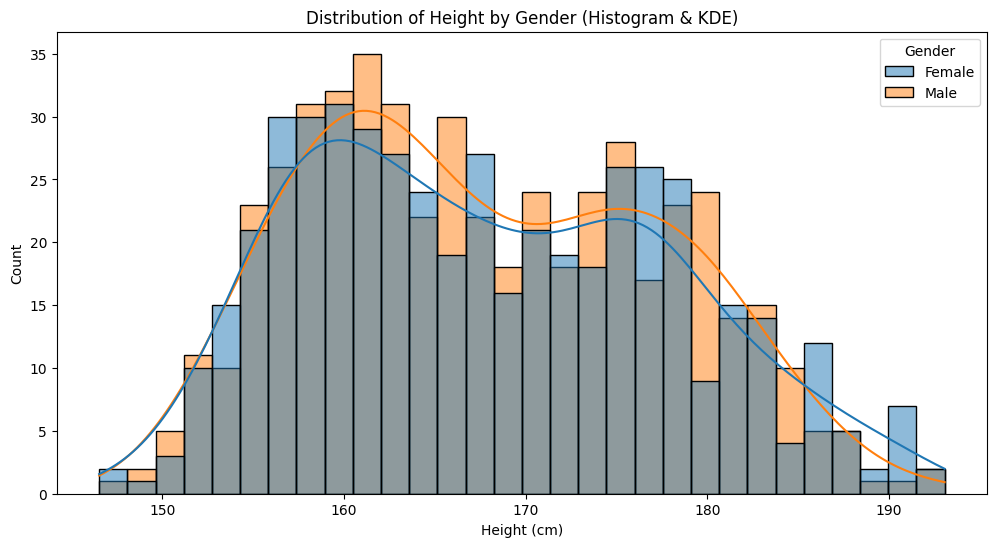

In [16]:
# 3. 히스토그램 및 KDE 플롯을 활용한 키 분포 분석
# 성별별 키의 분포를 히스토그램과 KDE(커널 밀도 추정) 곡선으로 시각화
plt.figure(figsize=(12, 6))
sns.histplot(df, x="Height", hue="Gender", kde=True, bins=30, alpha=0.5)
plt.title("Distribution of Height by Gender (Histogram & KDE)")  # 그래프 제목
plt.xlabel("Height (cm)")  # X축 라벨 지정
plt.ylabel("Count")  # Y축 라벨 지정
plt.show()

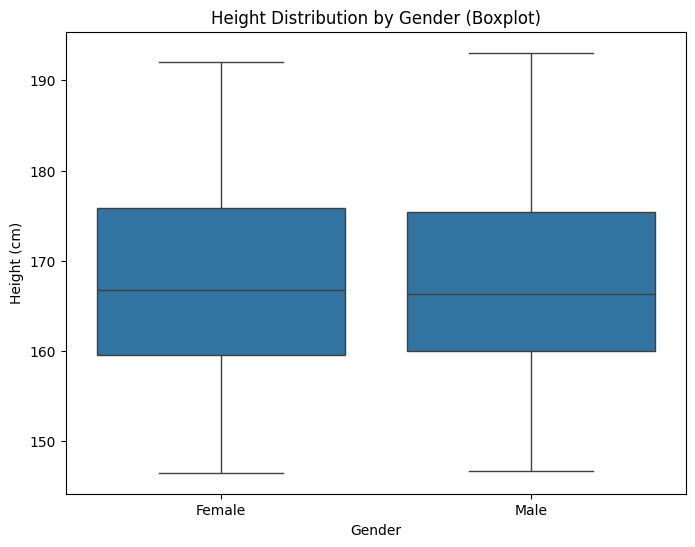

In [17]:
# 4. 박스플롯을 활용한 성별 간 키 분포 비교
# 박스플롯을 이용하여 성별별 키의 중앙값과 사분위수를 비교하여 분포를 시각적으로 분석
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="Height", data=df)
plt.title("Height Distribution by Gender (Boxplot)")  # 그래프 제목
plt.xlabel("Gender")  # X축 라벨 지정
plt.ylabel("Height (cm)")  # Y축 라벨 지정
plt.show()

In [20]:
# 5. Pandas의 groupby()를 사용하여 성별별 키의 통계값 계산
# 성별별 평균, 중앙값, 표준편차, 최소/최대 값을 계산하여 통계적 차이 확인
stats = df.groupby("Gender")["Height"].agg(["mean", "median", "std", "min", "max"])

# 성별별 키의 통계 데이터를 출력
print("\n성별별 키의 기초 통계:")
print(stats)


성별별 키의 기초 통계:
              mean      median        std         min         max
Gender                                                           
Female  167.859719  166.793699  10.050468  146.515567  192.078267
Male    167.690750  166.325366   9.641423  146.745151  193.057965


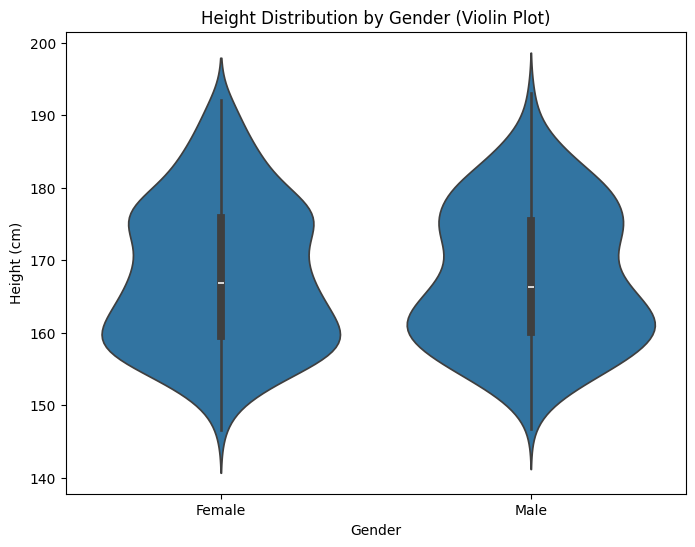

In [21]:
# 6. 바이올린 플롯을 활용한 성별별 키 분포 밀도 분석
# 박스플롯보다 더 자세한 분포를 보여주는 바이올린 플롯을 이용하여 성별 간 차이를 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(x="Gender", y="Height", data=df)
plt.title("Height Distribution by Gender (Violin Plot)")  # 그래프 제목
plt.xlabel("Gender")  # X축 라벨 지정
plt.ylabel("Height (cm)")  # Y축 라벨 지정
plt.show()